# Week 9 Wednesday

Comment: The attached file `mnist.csv` contains 42,000 of the usual 70,000 handwritten digits.  I decreased the number of rows just to make it a smaller size for uploading to Deepnote; even this smaller version is 73 megabytes.  (I wouldn't have done this if I were working locally on my own computer.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable('default', max_rows = 10000)

from sklearn.datasets import make_regression

## Part 1 - PCA with simulated data

In [ ]:
X, y, m = make_regression(n_samples=4000, n_features=1, noise=20, coef=True, random_state=529)
df = pd.DataFrame(X, columns=["x"])
df["y"] = y

In [ ]:
alt.Chart(df).mark_circle().encode(
    x="x",
    y="y"
)

alt.Chart(...)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_model = PCA()

In [ ]:
# Just input, no target, since unsupervised
pca_model.fit(df)

PCA()

In [ ]:
arr = pca_model.transform(df)

In [ ]:
type(arr)

numpy.ndarray

In [ ]:
arr[:3]

array([[-11.9795057 ,   0.41887263],
       [  2.54206288,  -0.20554913],
       [-32.28415112,  -0.39903818]])

In [ ]:
df_transform = pd.DataFrame(arr, columns=["PC1", "PC2"])

In [ ]:
alt.Chart(df_transform).mark_circle().encode(
    x="PC1",
    y="PC2"
)

alt.Chart(...)

In [ ]:
alt.Chart(df_transform).mark_circle().encode(
    x="PC1",
    y=alt.Y("PC2", scale=alt.Scale(domain=(-150, 150)))
)

alt.Chart(...)

In [ ]:
pca_model.explained_variance_ratio_

array([9.99780409e-01, 2.19591117e-04])

## Part 2 - PCA with MNIST

In [ ]:
df = pd.read_csv("mnist.csv")

In [ ]:
df[:3]

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  

[3 rows x 785 columns]

In [ ]:
df_label = df["label"]

In [ ]:
df_X = df.loc[:, "pixel0":]

In [ ]:
df_X.shape

(42000, 784)

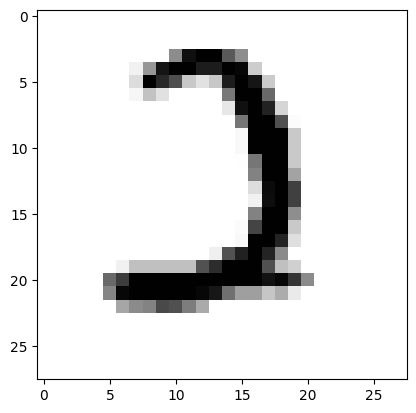

In [ ]:
fig, ax = plt.subplots()
ax.imshow(df_X.iloc[178].to_numpy().reshape((28,28)), cmap="binary");

In [ ]:
df_label.iloc[178]

2

Restrict the dataset to only images of 0 and 8.

In [ ]:
bool_ser = df_label.isin([0,8])
bool_ser

0        False
1         True
2        False
3        False
4         True
         ...  
41995     True
41996    False
41997    False
41998    False
41999    False
Name: label, Length: 42000, dtype: bool

In [ ]:
X_sub = df_X[bool_ser]
y_sub = df_label[bool_ser]

In [ ]:
y_sub.value_counts()

label
0    4132
8    4063
Name: count, dtype: int64

In [ ]:
X_sub.shape

(8195, 784)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(X_sub)

PCA(n_components=2)

In [ ]:
X_transform = pca.transform(X_sub)

In [ ]:
df_transform = pd.DataFrame(X_transform, columns=["PC1", "PC2"])

In [ ]:
df_transform[:3]

PC1          PC2
0  1160.227253 -1048.161600
1  1514.001737 -1096.474230
2   -45.408654   -45.805242

In [ ]:
alt.Chart(df_transform).mark_circle().encode(
    x="PC1",
    y="PC2"
)

alt.Chart(...)

In [ ]:
df_transform[:3]

PC1          PC2
0  1160.227253 -1048.161600
1  1514.001737 -1096.474230
2   -45.408654   -45.805242

In [ ]:
y_sub[:3]

1    0
4    0
5    0
Name: label, dtype: int64

In [ ]:
y_sub.reset_index(drop=True)

0       0
1       0
2       0
3       8
4       0
       ..
8190    0
8191    8
8192    0
8193    0
8194    0
Name: label, Length: 8195, dtype: int64

In [ ]:
df_transform["label"] = y_sub.reset_index(drop=True)

In [ ]:
df_transform[:3]

PC1          PC2  label
0  1160.227253 -1048.161600      0
1  1514.001737 -1096.474230      0
2   -45.408654   -45.805242      0

In [ ]:
alt.Chart(df_transform).mark_circle().encode(
    x="PC1",
    y="PC2",
    color="label:N"
)

alt.Chart(...)

In [ ]:
df_reset = df_transform.reset_index()
df_reset

index          PC1          PC2  label
0         0  1160.227253 -1048.161600      0
1         1  1514.001737 -1096.474230      0
2         2   -45.408654   -45.805242      0
3         3  -553.621756   785.414302      8
4         4   779.665844  1178.590268      0
...     ...          ...          ...    ...
8190   8190  1446.677423   529.649470      0
8191   8191  -764.906679  -595.978439      8
8192   8192   905.435172   381.444734      0
8193   8193   919.788642  -495.668776      0
8194   8194   744.664272  -520.716016      0

[8195 rows x 4 columns]

In [ ]:
alt.Chart(df_reset).mark_circle().encode(
    x="PC1",
    y="PC2",
    color="label:N",
    tooltip="index"
)

alt.Chart(...)

In [ ]:
arr_outlier = X_sub.iloc[7663].to_numpy().reshape((28,28))

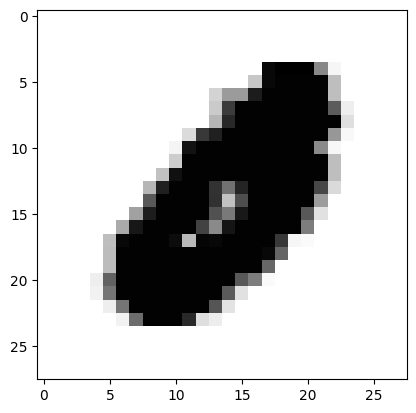

In [ ]:
fig, ax = plt.subplots()
ax.imshow(arr_outlier, cmap="binary")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=327c056f-8715-4f81-a1a5-1b19d8e49c01' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>